In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 601


In [26]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"q={city}&appid={weather_api_key}"
    api_url = url + city_url
    print(api_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(api_url).json()
    print(json.dumps(response, indent=4, sort_keys=True))

    
    
# loop through each city in the list and make an API call
    try:
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["name"]
        city_date = response["dt"]
    
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    except:
        print(f"No data found for {city}. Skipping...")

# Print completion message
print(city_data)
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?q=pandan&appid=45e4bc0a3b73b87430aeaa3f0e18608f
Processing Record 1 of Set 1 | pandan
{
    "base": "stations",
    "clouds": {
        "all": 51
    },
    "cod": 200,
    "coord": {
        "lat": 14.0453,
        "lon": 124.1694
    },
    "dt": 1683829148,
    "id": 1695546,
    "main": {
        "feels_like": 299.73,
        "grnd_level": 1011,
        "humidity": 84,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 299.73,
        "temp_max": 299.73,
        "temp_min": 299.73
    },
    "name": "Pandan",
    "sys": {
        "country": "PH",
        "sunrise": 1683839850,
        "sunset": 1683885718
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 49,
  

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -20.4189,
        "lon": 57.6953
    },
    "dt": 1683828953,
    "id": 934753,
    "main": {
        "feels_like": 298.75,
        "humidity": 73,
        "pressure": 1020,
        "temp": 298.28,
        "temp_max": 298.28,
        "temp_min": 297.71
    },
    "name": "Beau Vallon",
    "sys": {
        "country": "MU",
        "id": 2061,
        "sunrise": 1683772157,
        "sunset": 1683812520,
        "type": 1
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 3.6
    }
}
https://api.openweathermap.org/data/2.5/weather?q=sogndal&appid=45e4bc0a3b73b87430aeaa3f0e18608f
Processing Record 11 of Set 1 | sogndal
{
    "base": "stations",
    "clouds"

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 38.5167,
        "lon": -28.7
    },
    "dt": 1683828956,
    "id": 3372707,
    "main": {
        "feels_like": 293.12,
        "humidity": 64,
        "pressure": 1026,
        "temp": 293.37,
        "temp_max": 293.37,
        "temp_min": 292.47
    },
    "name": "Ribeira Grande",
    "sys": {
        "country": "PT",
        "id": 6883,
        "sunrise": 1683787637,
        "sunset": 1683838509,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 51,
        "gust": 8.94,
        "speed": 5.36
    }
}
https://api.openweathermap.org/data/2.5/weather?q=west island&appid=45e4bc0a3b73b87430aeaa3f0e18608f
Processing Record 20 of Set 1 | west island
{
    "base": "st

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 39.4756,
        "lon": -8.4095
    },
    "dt": 1683828958,
    "id": 8010613,
    "main": {
        "feels_like": 294.48,
        "grnd_level": 1006,
        "humidity": 34,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 295.32,
        "temp_max": 297.46,
        "temp_min": 291.55
    },
    "name": "Vila Nova da Barquinha Municipality",
    "sys": {
        "country": "PT",
        "id": 49116,
        "sunrise": 1683782640,
        "sunset": 1683833767,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 335,
        "gust": 11.18,
        "speed": 7.52
    }
}
https://api.openweathermap.org/data/2.5/weather?q=atafu village&appid=45e4bc0a3b7

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -33.0117,
        "lon": 17.9442
    },
    "dt": 1683828960,
    "id": 3361934,
    "main": {
        "feels_like": 287.32,
        "grnd_level": 1019,
        "humidity": 63,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 288.12,
        "temp_max": 288.12,
        "temp_min": 288.12
    },
    "name": "Saldanha",
    "sys": {
        "country": "ZA",
        "sunrise": 1683782912,
        "sunset": 1683820846
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 176,
        "gust": 11.41,
        "speed": 9.76
    }
}
https://api.openweathermap.org/data/2.5/weather?q=saipan&appid=45e4bc0a3b73b87430aeaa3f0e18608f
Processing Record 40 of Set 1 | saipan
{
 

{
    "base": "stations",
    "clouds": {
        "all": 14
    },
    "cod": 200,
    "coord": {
        "lat": 43.3236,
        "lon": 145.575
    },
    "dt": 1683828882,
    "id": 2128975,
    "main": {
        "feels_like": 271.88,
        "grnd_level": 1017,
        "humidity": 82,
        "pressure": 1020,
        "sea_level": 1020,
        "temp": 276.19,
        "temp_max": 276.19,
        "temp_min": 276.19
    },
    "name": "Nemuro",
    "sys": {
        "country": "JP",
        "sunrise": 1683831472,
        "sunset": 1683883821
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 288,
        "gust": 7.88,
        "speed": 5.3
    }
}
https://api.openweathermap.org/data/2.5/weather?q=olonkinbyen&appid=45e4bc0a3b73b87430aeaa3f0e18608f
Processing Record 50 of Set 1 | olonkinbyen
{
 

{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 65.7461,
        "lon": -19.6394
    },
    "dt": 1683828802,
    "id": 2627309,
    "main": {
        "feels_like": 285.59,
        "grnd_level": 1014,
        "humidity": 60,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 286.62,
        "temp_max": 286.62,
        "temp_min": 286.62
    },
    "name": "Sau\u00f0arkrokur",
    "sys": {
        "country": "IS",
        "sunrise": 1683777630,
        "sunset": 1683844168
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 177,
        "gust": 10.06,
        "speed": 8.51
    }
}
https://api.openweathermap.org/data/2.5/weather?q=georgetown&appid=45e4bc0a3b73b87430aeaa3f0e18608f
Processing Record 8 of Set 2 | ge

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -16.2325,
        "lon": 39.9086
    },
    "dt": 1683828969,
    "id": 1052944,
    "main": {
        "feels_like": 298.52,
        "grnd_level": 1016,
        "humidity": 76,
        "pressure": 1017,
        "sea_level": 1017,
        "temp": 298,
        "temp_max": 298,
        "temp_min": 298
    },
    "name": "Angoche",
    "sys": {
        "country": "MZ",
        "sunrise": 1683776074,
        "sunset": 1683817141
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 143,
        "gust": 3.41,
        "speed": 2.69
    }
}
https://api.openweathermap.org/data/2.5/weather?q=talnakh&appid=45e4bc0a3b73b87430aeaa3f0e18608f
Processing Record 19 of Set 2 | talnakh
{
    "base"

{
    "base": "stations",
    "clouds": {
        "all": 16
    },
    "cod": 200,
    "coord": {
        "lat": 45.5549,
        "lon": -0.8967
    },
    "dt": 1683828971,
    "id": 3026644,
    "main": {
        "feels_like": 286.92,
        "grnd_level": 1017,
        "humidity": 70,
        "pressure": 1017,
        "sea_level": 1017,
        "temp": 287.59,
        "temp_max": 287.61,
        "temp_min": 285.28
    },
    "name": "La Passe",
    "sys": {
        "country": "FR",
        "id": 50700,
        "sunrise": 1683779896,
        "sunset": 1683832905,
        "type": 2
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 313,
        "gust": 7.04,
        "speed": 5.56
    }
}
https://api.openweathermap.org/data/2.5/weather?q=chapeco&appid=45e4bc0a3b73b87430aeaa3f0e18608f
Processin

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 16.8634,
        "lon": -99.8901
    },
    "dt": 1683828685,
    "id": 3533462,
    "main": {
        "feels_like": 310.6,
        "humidity": 62,
        "pressure": 1011,
        "temp": 305.05,
        "temp_max": 305.05,
        "temp_min": 305.05
    },
    "name": "Acapulco de Ju\u00e1rez",
    "sys": {
        "country": "MX",
        "id": 7103,
        "sunrise": 1683806992,
        "sunset": 1683853325,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 9656,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 4.12
    }
}
https://api.openweathermap.org/data/2.5/weather?q=yashkino&appid=45e4bc0a3b73b87430aeaa3f0e18608f
Processing Record 38 of Set 2 | yashkino
{
    "base": "stations",


{
    "base": "stations",
    "clouds": {
        "all": 16
    },
    "cod": 200,
    "coord": {
        "lat": -40.9597,
        "lon": 175.6575
    },
    "dt": 1683828977,
    "id": 2206890,
    "main": {
        "feels_like": 275.03,
        "grnd_level": 1006,
        "humidity": 90,
        "pressure": 1020,
        "sea_level": 1020,
        "temp": 276.36,
        "temp_max": 276.36,
        "temp_min": 276.36
    },
    "name": "Masterton",
    "sys": {
        "country": "NZ",
        "sunrise": 1683832455,
        "sunset": 1683868399
    },
    "timezone": 43200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 290,
        "gust": 1.43,
        "speed": 1.52
    }
}
https://api.openweathermap.org/data/2.5/weather?q=bredasdorp&appid=45e4bc0a3b73b87430aeaa3f0e18608f
Processing Record 47 of Set 2 | bredasdorp

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -10.4217,
        "lon": 105.6791
    },
    "dt": 1683828980,
    "id": 2078127,
    "main": {
        "feels_like": 303.75,
        "humidity": 94,
        "pressure": 1013,
        "temp": 299.97,
        "temp_max": 299.97,
        "temp_min": 299.97
    },
    "name": "Flying Fish Cove",
    "sys": {
        "country": "CX",
        "id": 9592,
        "sunrise": 1683846230,
        "sunset": 1683888213,
        "type": 1
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 5.66
    }
}
https://api.openweathermap.org/data/2.5/weather?q=sterling&appid=45e4bc0a3b73b87430aeaa3f0e18608f
Processing Record 6 of Set 3 | sterling
{
    "base": "stations",
   

SSLError: HTTPSConnectionPool(host='api.openweathermap.org', port=443): Max retries exceeded with url: /data/2.5/weather?q=oranjemund&appid=45e4bc0a3b73b87430aeaa3f0e18608f (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:997)')))

In [ ]:

# Create scatter plot for Latitude vs. Temperature
plt.scatter([data['Lat'] for data in city_data], [data['Max Temp'] for data in city_data])
plt.xlabel('Latitude')
plt.ylabel('Temperature (°F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid(True)
plt.show()

# Create scatter plot for Latitude vs. Humidity
plt.scatter([data['Lat'] for data in city_data], [data['Humidity'] for data in city_data])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid(True)
plt.show()

# Create scatter plot for Latitude vs. Cloudiness
plt.scatter([data['Lat'] for data in city_data], [data['Cloudiness'] for data in city_data])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid(True)
plt.show()

# Create scatter plot for Latitude vs. Wind Speed
plt.scatter([data['Lat'] for data in city_data], [data['Wind Speed'] for data in city_data])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define a function for creating scatter plots and linear regression
def plot_scatter(x_values, y_values, x_label, y_label, title):
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression values
    x_array = np.array(x_values)
    regress_values = x_array * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    
    # Add equation to plot
    plt.annotate(line_eq,(min(x_values),max(y_values)-20),fontsize=15,color="red")
    
    # Print r value
    print(f"The r-value is: {rvalue}")
    
    # Show plot
    plt.show()

In [ ]:
# Create function to plot scatter and linear regression for Southern Hemisphere
def plot_southern(x_values, y_values, x_label, y_label, title):
    # Filter data for Southern Hemisphere
    southern_data = list(filter(lambda x: x['Lat'] < 0, city_data))
    x_southern = [data['Lat'] for data in southern_data]
    y_southern = [data[y_values] for data in southern_data]
    
    # Call plot_scatter function to create scatter plot and linear regression
    plot_scatter(x_southern, y_southern, x_label, y_label, title)

# Southern vs Northern Latitude vs Max Temperature

In [ ]:
# Create scatter plot and linear regression for Latitude vs. Temperature
plot_scatter([data["Lat"] for data in city_data], [data["Max Temp"] for data in city_data], "Latitude", "Temperature (°F)", "City Latitude vs. Max Temperature (Northern Hemisphere)")



In [ ]:
# Create scatter plot and linear regression for Latitude vs. Temperature in Southern Hemisphere
plot_southern('Lat', 'Max Temp', 'Latitude', 'Temperature (°F)', 'City Latitude vs. Max Temperature (Southern Hemisphere)')


linear regression analysis

For the Northern hemisphere the negative slope of the linear regression line shows that as latitude increases, the maximum temperature decreases. For the Southern Hemisphere, the positive slope of the linear regression line indicates that as latitude decreases, the maximum temperature tends to increase.

# Southern vs Northern Latitude vs Humidity

In [ ]:
# Create scatter plot and linear regression for Latitude vs. Humidity
plot_scatter([data["Lat"] for data in city_data], [data["Humidity"] for data in city_data], "Latitude", "Humidity (%)", "City Latitude vs. Humidity Northern Hemisphere")



In [ ]:
# Create scatter plot and linear regression for Latitude vs. Humidity in Southern Hemisphere
plot_southern('Lat', 'Humidity', 'Latitude', 'Humidity (%)', 'City Latitude vs. Humidity (Southern Hemisphere)')


There is no significant correlation between humidity and latitude in either the Northern or southern Hemispheres. The linear regression for this relationship shows a weak negative correlation with an R-value of -0.11.

# Southern vs Northern Latitude vs Cloudiness

In [ ]:
# Create scatter plot and linear regression for Latitude vs. Cloudiness
plot_scatter([data["Lat"] for data in city_data], [data["Cloudiness"] for data in city_data], "Latitude", "Cloudiness (%)", "City Latitude vs. Cloudiness (Northern Hemisphere)")



The r-value is: 0.04270051630912167


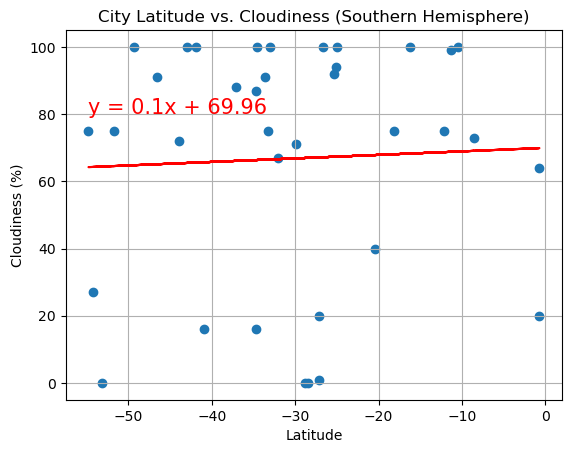

In [27]:
# Create scatter plot and linear regression for Latitude vs. Cloudiness in Southern Hemisphere
plot_southern('Lat', 'Cloudiness', 'Latitude', 'Cloudiness (%)', 'City Latitude vs. Cloudiness (Southern Hemisphere)')



Both the southern and northern hemispheres have weak positive correlations in this linear regression.

# Southern vs Northern Latitude vs Wind Speed

The r-value is: -0.008110568925887567


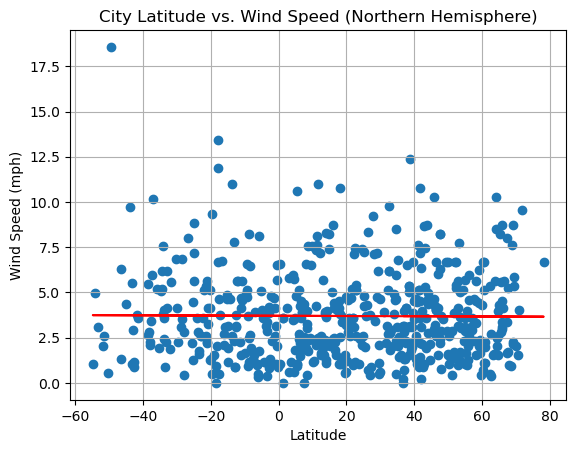

In [21]:
# Create scatter plot and linear regression for Latitude vs. Wind Speed
plot_scatter([data["Lat"] for data in city_data], [data["Wind Speed"] for data in city_data], "Latitude", "Wind Speed (mph)", "City Latitude vs. Wind Speed (Northern Hemisphere)")


The r-value is: -0.13652775279522275


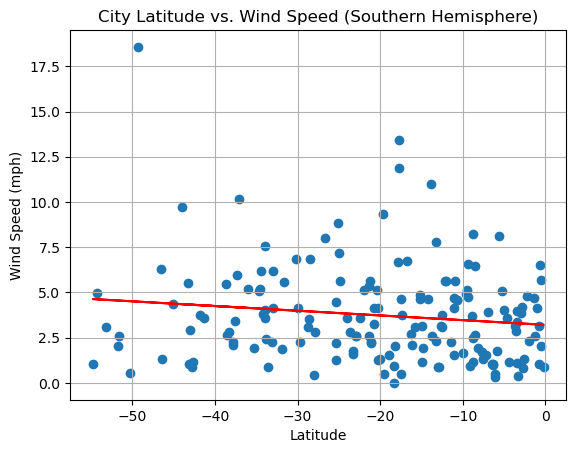

In [22]:

# Create scatter plot and linear regression for Latitude vs. Wind Speed in Southern Hemisphere
plot_southern('Lat', 'Wind Speed', 'Latitude', 'Wind Speed (mph)', 'City Latitude vs. Wind Speed (Southern Hemisphere)')





The linear regression for this relationship shows a weak positive correlation for both the Northern and southern hemispheres.

In [28]:
import csv

# Open a new CSV file to write data
with open('city_data.csv', mode='w', newline='') as csv_file:

    # Define the fieldnames for the CSV file
    fieldnames = ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']

    # Create a CSV writer object
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Write the header row to the CSV file
    writer.writeheader()

    # Write each row of data to the CSV file
    for data in city_data:
        writer.writerow(data)
